In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="numpy")
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor


In [42]:
df =  pd.read_csv("house_price.csv")


In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# take the most correlated features with SalePrice
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

corr5 = df.corr().nlargest(6, 'SalePrice')['SalePrice'].index

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [44]:
#  make CentralAir binary
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})


In [45]:
# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the Neighborhood column
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])



In [46]:
#  add YearBuilt - YearSold
df['Age'] = df['YearBuilt'] - df['YrSold']


In [47]:
df2 = df.copy()

In [48]:
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','Age','RoofMatl']
df = df[features]
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
CentralAir      0
Neighborhood    0
1stFlrSF        0
FullBath        0
Age             0
RoofMatl        0
dtype: int64

In [49]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','Age']
df = df[features]

# Calculate the Z-score for each data point
z = np.abs((df - df.mean()) / df.std())

# Set the threshold for outlier detection
threshold = 2

# Find the indices of outliers
outlier_indices = np.where(z > threshold)

# Extract the outliers
outliers = df.iloc[outlier_indices]

# Drop the outliers from the original dataframe
df = df.drop(outliers.index)

# Print the number of outliers detected and the shape of the cleaned dataframe
print(f'Number of outliers detected: {len(outliers)}')
print(f'Shape of cleaned dataframe: {df.shape}')

Number of outliers detected: 730
Shape of cleaned dataframe: (1090, 11)


In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 20800.91202471281
R-squared: 0.8223


In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 20800.91202471281
R-squared: 0.8223


In [53]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','Age']
df = df[features]

# Calculate the Z-score for each data point
z = np.abs((df - df.mean()) / df.std())

# Set the threshold for outlier detection
threshold = 4

# Find the indices of outliers
outlier_indices = np.where(z > threshold)

# Extract the outliers
outliers = df.iloc[outlier_indices]

# Drop the outliers from the original dataframe
df = df.drop(outliers.index)

# Print the number of outliers detected and the shape of the cleaned dataframe
print(f'Number of outliers detected: {len(outliers)}')
print(f'Shape of cleaned dataframe: {df.shape}')

Number of outliers detected: 0
Shape of cleaned dataframe: (1090, 11)


In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")


RMSE: 20800.91202471281
R-squared: 0.8223


In [55]:
# Calculate the IQR for each column
q1 = df.quantile(0.05)
q3 = df.quantile(0.95)
iqr = q3 - q1

# Define the threshold for outlier detection
threshold = 2

# Find the outliers and extract them from the original dataframe
outliers = df[((df < (q1 - threshold * iqr)) | (df > (q3 + threshold * iqr))).any(axis=1)]
df = df[~((df < (q1 - threshold * iqr)) | (df > (q3 + threshold * iqr))).any(axis=1)]


In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 20800.91202471281
R-squared: 0.8223


In [57]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','Age']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 20800.91202471281
R-squared: 0.8223


In [59]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','YearBuilt']
df = df2[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 28686.50008880404
R-squared: 0.8927


In [60]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 29974.28975640472
R-squared: 0.8829


In [62]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath','Age']
df = df2[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 29832.46120341999
R-squared: 0.8840


In [ ]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 30742.358788458565
R-squared: 0.8768


In [63]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 30818.875009600728
R-squared: 0.8762


In [64]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 31180.817921418162
R-squared: 0.8732


In [65]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 31981.477605115197
R-squared: 0.8667


In [66]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 32942.445905643755
R-squared: 0.8585


In [67]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual']
df = df[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 46399.71614366031
R-squared: 0.7193


In [68]:
# Load the dataset
house_df = pd.read_csv("house_price.csv")

# Compute the z-scores of the SalePrice column
z_scores = (house_df['SalePrice'] - house_df['SalePrice'].mean()) / house_df['SalePrice'].std()

# Identify outliers as rows with z-scores greater than 3 or less than -3
outliers = np.abs(z_scores) > 3

# Remove the outliers from the dataset
house_df = house_df[~outliers]

# Save the cleaned dataset to a new CSV file
house_df.to_csv("house_price_cleaned.csv", index=False)

In [80]:
df2 = pd.read_csv("house_price_cleaned.csv")
df3 = pd.read_csv("house_price.csv")

In [81]:
#  make CentralAir binary
df2['CentralAir'] = df2['CentralAir'].map({'Y': 1, 'N': 0})

In [82]:
# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the Neighborhood column
df2['Neighborhood'] = le.fit_transform(df2['Neighborhood'])

In [83]:
# Select the relevant columns
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','CentralAir','Neighborhood','1stFlrSF','FullBath']
df2 = df2[features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('SalePrice', axis=1), df2['SalePrice'], test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
print(f"R-squared: {r2:.4f}")

RMSE: 31223.00870048365
R-squared: 0.7750


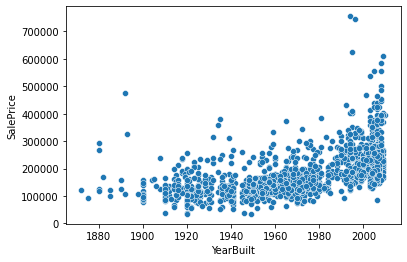

In [92]:
fig = sns.scatterplot(y="SalePrice", x="YearBuilt",data=df3)

In [84]:
# box plot of roof material and sales price with plotly
fig = px.box(df3, x="RoofMatl", y="SalePrice", color = "RoofMatl",  title="RoofMatl and sales price")
fig.show()


In [93]:
#scatter plot of sale prices vs years built 
fig = px.scatter(df3, x="SalePrice", y="YearBuilt", color ="YearBuilt")
fig.show()

In [94]:
#histogram analysis of overall quality effect sale prices 
fig = px.histogram(df3, x="SalePrice", y="OverallQual", color ="OverallQual")
fig.show()

In [95]:
# CentralAir and sales price with plotly
fig = px.box(df3, y="CentralAir", x="SalePrice", color =  "CentralAir" ,  title="CentralAir and sales price")
fig.show()


In [96]:
#boxplot representation of sale prices vs overall quality. 
fig2 = px.box(df3, 
              y="SalePrice", 
              x="OverallQual",
              color ="OverallQual",
              title= "Overall Quality effect on Sale Prices"
             )
fig2.show()

In [97]:
# Heating and sales price with plotly
fig = px.box(df3, y="Heating", x="SalePrice", color =  "Heating" ,  title="Heating and sales price")
fig.show()


In [98]:
# Foundation and sales price with plotly
fig = px.box(df3, y="Foundation", x="SalePrice", color =  "Foundation" ,  title="Foundation and sales price")
fig.show()
